# 안녕하세요^^ 
## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구별 업종 등록 데이터" 를 확인해 보도록 하겠습니다

In [ ]:
# 필요 라이브러리부터 설치합니다.
# %pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.4 business_type_202401.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터(제공 가능한 최신 버전)
    * 택시 운송업 (개인택시 등록자 주거지)
    * 한식일반음식점업
    * 용달 화물자동차 운송업(개인용달 등록자 주거지)
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* 'business_type_202401.csv'파일을 'seoul_business' 변수에 저장하고 그 데이터를 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd

seoul_business = pd.read_csv('../미니프로젝트 1차_실습파일/1.4 business_type_202401.csv',sep=",", encoding = 'UTF-8')

In [2]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_business.shape

(451, 22)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_business' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# info()
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구           451 non-null    object
 1   동             451 non-null    object
 2   다수업종 상위10     451 non-null    object
 3   다수업종 상위10.1   451 non-null    object
 4   다수업종 상위10.2   451 non-null    object
 5   다수업종 상위10.3   451 non-null    object
 6   다수업종 상위10.4   451 non-null    object
 7   다수업종 상위10.5   451 non-null    object
 8   다수업종 상위10.6   451 non-null    object
 9   다수업종 상위10.7   451 non-null    object
 10  다수업종 상위10.8   451 non-null    object
 11  다수업종 상위10.9   451 non-null    object
 12  다수업종 상위10.10  451 non-null    object
 13  다수업종 상위10.11  451 non-null    object
 14  다수업종 상위10.12  451 non-null    object
 15  다수업종 상위10.13  451 non-null    object
 16  다수업종 상위10.14  451 non-null    object
 17  다수업종 상위10.15  451 non-null    object
 18  다수업종 상위10.16  451 non-null    object
 19  다수업종 상위1

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# describe()
seoul_business.describe().T

,count,unique,top,freq
자치구,451,27,송파구,28
동,451,425,소계,25
다수업종 상위10,451,226,71,7
다수업종 상위10.1,451,280,11,7
다수업종 상위10.2,451,176,24,11
다수업종 상위10.3,451,305,104,6
다수업종 상위10.4,451,177,56,8
다수업종 상위10.5,451,180,56,9
다수업종 상위10.6,451,142,40,11
다수업종 상위10.7,451,205,54,9


In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# head()
seoul_business.head()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,자치구,동,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,...,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220


In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# tail()
seoul_business.tail()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
446,강동구,성내3동,120,120,135,390,73,73,104,163,...,54,133,10,86,57,103,66,199,44,164
447,강동구,둔촌2동,117,436,63,249,89,89,61,108,...,34,85,10,788,21,39,35,90,24,101
448,강동구,암사1동,209,372,71,195,153,153,67,107,...,29,59,3,6,47,98,31,67,34,98
449,강동구,천호2동,157,187,152,509,144,151,97,188,...,63,212,4,17,95,268,24,42,69,245
450,강동구,길동,"1,441","1,557",152,436,217,225,146,237,...,71,228,6,126,122,294,39,136,70,224


#### [실습문제3] 데이터 확인 및 처리

* head 와 tail 을 보았을때, 어느 데이터만 가져와야 할지 생각 해 봅시다.
* 두번째 행부터 데이터가 시작된다.

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# header=1
seoul_business = pd.read_csv('../미니프로젝트 1차_실습파일/1.4 business_type_202401.csv', sep=",", encoding = "UTF-8", header=1)


In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# head()
seoul_business.head()

,자치구,동,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,...,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
1,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
2,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
3,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220
4,종로구,삼청동,5,5,42,145,4,4,9,10,...,66,243,2,3,3,8,-,-,7,33


In [11]:
list(seoul_business)

['자치구',
 '동',
 '택시운송업',
 '택시운송업.1',
 '한식 일반 음식점업',
 '한식 일반 음식점업.1',
 '용달 화물자동차 운송업',
 '용달 화물자동차 운송업.1',
 '부동산 중개 및 대리업',
 '부동산 중개 및 대리업.1',
 '두발미용업',
 '두발미용업.1',
 '커피전문점',
 '커피전문점.1',
 '남녀용 겉옷 및 셔츠 도매업',
 '남녀용 겉옷 및 셔츠 도매업.1',
 '기타주점업',
 '기타주점업.1',
 '일반 교과 학원',
 '일반 교과 학원.1',
 '한식 육류요리 전문점',
 '한식 육류요리 전문점.1']

In [19]:
seoul_business.loc[1, :]

자치구                       합계
동                         합계
택시운송업                 47,176
택시운송업.1               76,701
한식 일반 음식점업            29,225
한식 일반 음식점업.1         100,183
용달 화물자동차 운송업          28,494
용달 화물자동차 운송업.1        29,356
부동산 중개 및 대리업          24,013
부동산 중개 및 대리업.1        42,636
두발미용업                 18,080
두발미용업.1               36,214
커피전문점                 16,255
커피전문점.1               57,322
남녀용 겉옷 및 셔츠 도매업       13,388
남녀용 겉옷 및 셔츠 도매업.1     51,116
기타주점업                 13,339
기타주점업.1               31,371
일반 교과 학원              11,911
일반 교과 학원.1            50,773
한식 육류요리 전문점           11,109
한식 육류요리 전문점.1         44,653
Name: 1, dtype: object

In [42]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 구별 등록 업종 중 버스정류장 설치에 중요한 업종 데이터만 불러오기
# 예 : 대중교통 이동수요가 높을 것으로 예상되는 업종, 종사자수가 많은 업종
temp = seoul_business.loc[:, ['자치구', '동', '한식 일반 음식점업.1', '용달 화물자동차 운송업.1', '부동산 중개 및 대리업.1', '커피전문점.1',
                              '두발미용업.1', '남녀용 겉옷 및 셔츠 도매업.1', '택시운송업.1', '기타주점업.1', '일반 교과 학원.1', '한식 육류요리 전문점.1' ]]

temp

,자치구,동,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,커피전문점.1,두발미용업.1,남녀용 겉옷 및 셔츠 도매업.1,택시운송업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1
0,자치구,동,종사자수,종사자수,종사자수,종사자수,종사자수,종사자수,종사자수,종사자수,종사자수,종사자수
1,합계,합계,"100,183","29,356","42,636","57,322","36,214","51,116","76,701","31,371","50,773","44,653"
2,종로구,소계,"5,912",646,889,"3,613",480,962,215,"1,413",382,"1,982"
3,종로구,사직동,982,12,96,525,66,18,7,177,34,220
4,종로구,삼청동,145,4,10,243,-,3,5,8,-,33
...,...,...,...,...,...,...,...,...,...,...,...,...
445,강동구,성내3동,390,73,163,133,113,86,120,103,199,164
446,강동구,둔촌2동,249,89,108,85,75,788,436,39,90,101
447,강동구,암사1동,195,153,107,59,114,6,372,98,67,98
448,강동구,천호2동,509,151,188,212,168,17,187,268,42,245


In [43]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# '동' 열이 '소계'인 행만을 필터링 (구별 데이터만 필요함)
temp = temp.loc[temp['동'] == '소계']
temp.head()

,자치구,동,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,커피전문점.1,두발미용업.1,남녀용 겉옷 및 셔츠 도매업.1,택시운송업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1
2,종로구,소계,"5,912",646,889,"3,613",480,962,215,"1,413",382,"1,982"
20,중구,소계,"6,414",333,"1,152","3,542",816,"24,248",235,982,175,"2,121"
36,용산구,소계,"2,987",466,"1,214","2,076",777,317,523,"1,332",573,"1,184"
53,성동구,소계,"2,785","1,161","1,453","1,859",851,"1,572","2,527",621,"1,494","1,545"
71,광진구,소계,"2,861",985,"1,313","1,887","1,337",687,"1,744","1,577","1,646","1,678"


In [44]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# '동' 열 제거
temp2 = temp.drop(['동'], axis = 1)
temp2.head()

,자치구,한식 일반 음식점업.1,용달 화물자동차 운송업.1,부동산 중개 및 대리업.1,커피전문점.1,두발미용업.1,남녀용 겉옷 및 셔츠 도매업.1,택시운송업.1,기타주점업.1,일반 교과 학원.1,한식 육류요리 전문점.1
2,종로구,"5,912",646,889,"3,613",480,962,215,"1,413",382,"1,982"
20,중구,"6,414",333,"1,152","3,542",816,"24,248",235,982,175,"2,121"
36,용산구,"2,987",466,"1,214","2,076",777,317,523,"1,332",573,"1,184"
53,성동구,"2,785","1,161","1,453","1,859",851,"1,572","2,527",621,"1,494","1,545"
71,광진구,"2,861",985,"1,313","1,887","1,337",687,"1,744","1,577","1,646","1,678"


In [45]:
temp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2 to 432
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   자치구                25 non-null     object
 1   한식 일반 음식점업.1       25 non-null     object
 2   용달 화물자동차 운송업.1     25 non-null     object
 3   부동산 중개 및 대리업.1     25 non-null     object
 4   커피전문점.1            25 non-null     object
 5   두발미용업.1            25 non-null     object
 6   남녀용 겉옷 및 셔츠 도매업.1  25 non-null     object
 7   택시운송업.1            25 non-null     object
 8   기타주점업.1            25 non-null     object
 9   일반 교과 학원.1         25 non-null     object
 10  한식 육류요리 전문점.1      25 non-null     object
dtypes: object(11)
memory usage: 2.3+ KB


In [46]:
for col in temp2.columns[1:]:
    temp2[col] = temp2[col].str.replace(',', '').astype(int)
temp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2 to 432
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   자치구                25 non-null     object
 1   한식 일반 음식점업.1       25 non-null     int32 
 2   용달 화물자동차 운송업.1     25 non-null     int32 
 3   부동산 중개 및 대리업.1     25 non-null     int32 
 4   커피전문점.1            25 non-null     int32 
 5   두발미용업.1            25 non-null     int32 
 6   남녀용 겉옷 및 셔츠 도매업.1  25 non-null     int32 
 7   택시운송업.1            25 non-null     int32 
 8   기타주점업.1            25 non-null     int32 
 9   일반 교과 학원.1         25 non-null     int32 
 10  한식 육류요리 전문점.1      25 non-null     int32 
dtypes: int32(10), object(1)
memory usage: 1.4+ KB


In [47]:
# 해당 데이터프레임을 csv 파일로 저장하세요.

temp2.to_csv("../미니프로젝트 1차_실습파일/seoul_business_info.csv", index=False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [9]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

In [32]:
seoul_business_info = pd.read_csv('../미니프로젝트 1차_실습파일/seoul_business_info.csv')
seoul_business_info.head()

,자치구,한식 일반 음식점업.1,커피전문점.1,택시운송업.1
0,종로구,5912,3613,215
1,중구,6414,3542,235
2,용산구,2987,2076,523
3,성동구,2785,1859,2527
4,광진구,2861,1887,1744


In [33]:
seoul_business_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구           25 non-null     object
 1   한식 일반 음식점업.1  25 non-null     int64 
 2   커피전문점.1       25 non-null     int64 
 3   택시운송업.1       25 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 932.0+ bytes


#### [실습문제4] 데이터 분포 알아보기
* 여러 변수들을 다양한 그래프로 그려보고 인사이트를 도출해보세요.

In [34]:
feature = '자치구'
targets = list(seoul_business_info)[1:]

In [13]:
targets

['한식 일반 음식점업.1',
 '남녀용 겉옷 및 셔츠 도매업.1',
 '기타주점업.1',
 '일반 교과 학원.1',
 '한식 육류요리 전문점.1',
 '커피전문점.1',
 '택시운송업.1']

In [40]:
def eda_cat_num(feature, targets, data):
    plt.figure(figsize = (24, 8))
    for i in range(len(targets)):
        plt.subplot(1, 3, i+1)
        sns.barplot(x = feature, y = targets[i], data = data)
        plt.xticks(rotation = 45)
    plt.tight_layout()    
    plt.show()
    
    for i in range(len(targets)):
        head5 = list(data.loc[:, [feature, targets[i]]].sort_values(targets[i], ascending = False)[feature].head(5))
        tail5 = list(data.loc[:, [feature, targets[i]]].sort_values(targets[i], ascending = False)[feature].tail(5))

        print(f'{targets[i]} 상위 5개 지역: {head5}')
        print(f'{targets[i]} 하위 5개 지역: {tail5}')

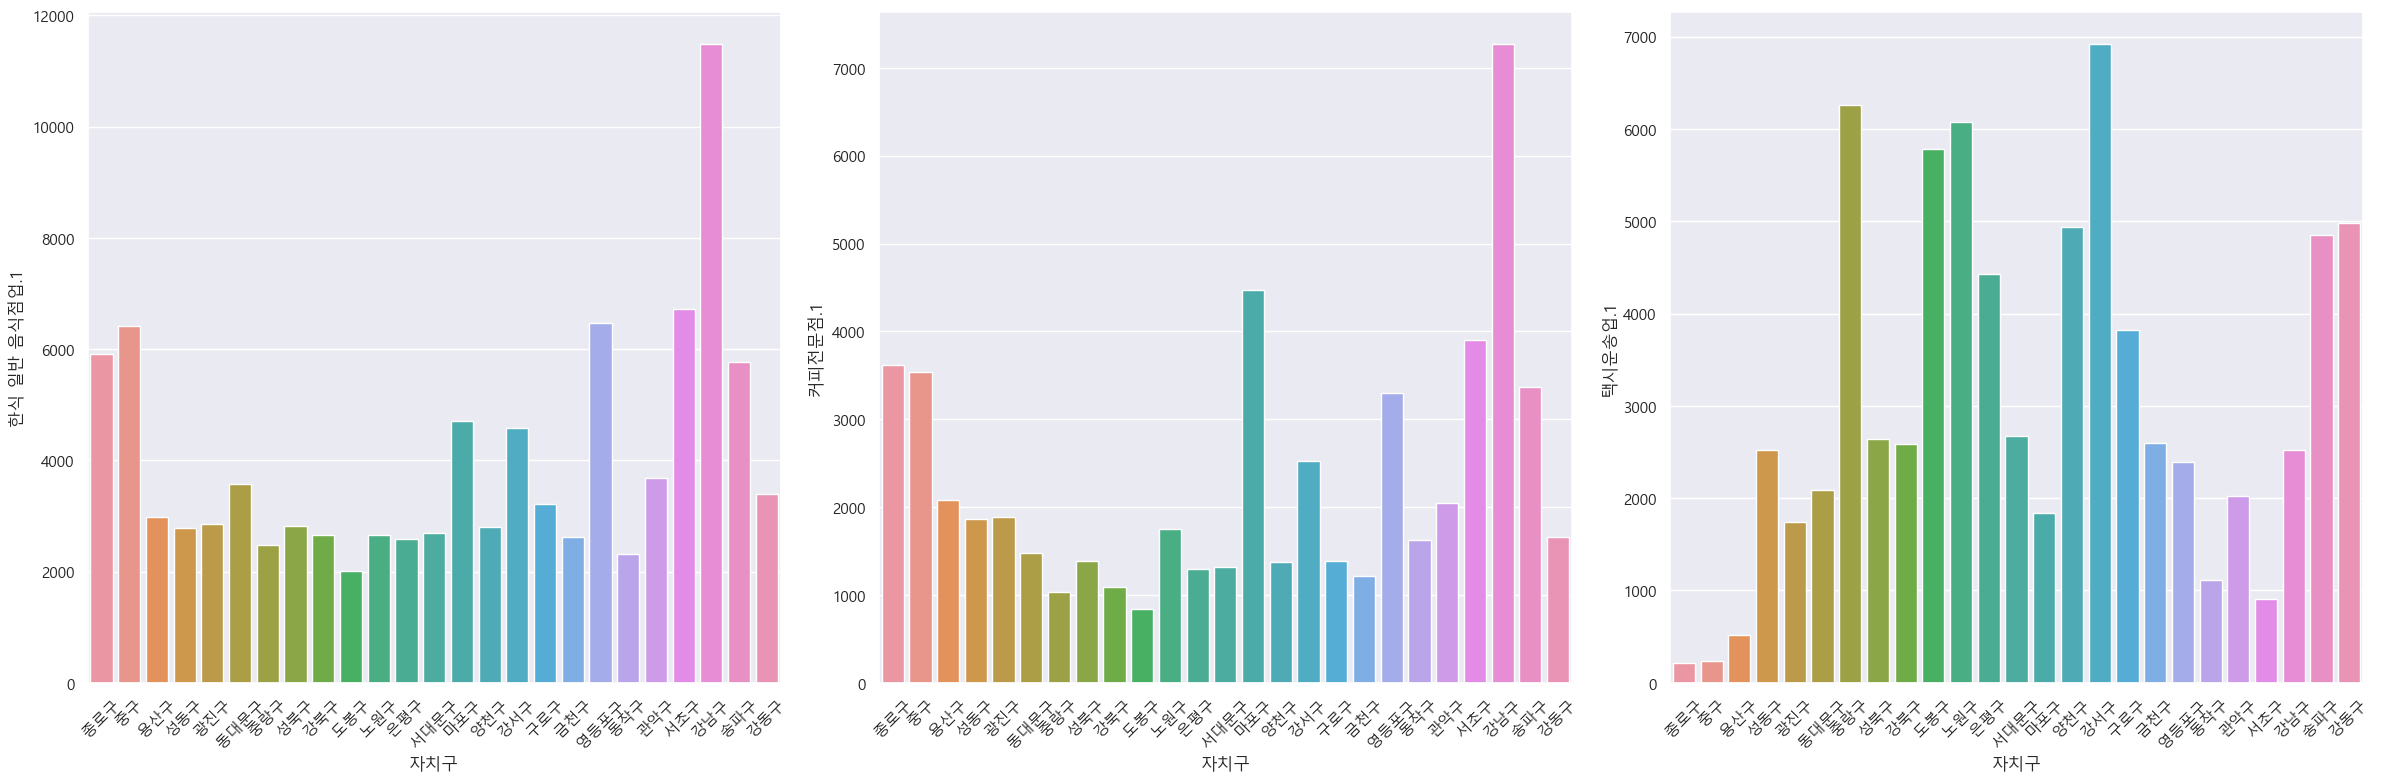

한식 일반 음식점업.1 상위 5개 지역: ['강남구', '서초구', '영등포구', '중구', '종로구']
한식 일반 음식점업.1 하위 5개 지역: ['금천구', '은평구', '중랑구', '동작구', '도봉구']
커피전문점.1 상위 5개 지역: ['강남구', '마포구', '서초구', '종로구', '중구']
커피전문점.1 하위 5개 지역: ['은평구', '금천구', '강북구', '중랑구', '도봉구']
택시운송업.1 상위 5개 지역: ['강서구', '중랑구', '노원구', '도봉구', '강동구']
택시운송업.1 하위 5개 지역: ['동작구', '서초구', '용산구', '중구', '종로구']


In [41]:
feature = '자치구'
targets = list(seoul_business_info)[1:]

eda_cat_num(feature, targets, seoul_business_info)

#### 위 차트를 통해 알게된 사실을 정리
1. 커피, 주점, 음식점의 그래프는 비슷한 분포를 보인다 (강남, 서초 등에 많이 분포 / 도봉구, 금천구, 중랑구에 많이 없음)
2. 유동인구, 인구수 등의 수치가 높았던 지역구 들이 음식점, 유흥주점의 수도 역시 높았다 (반대로 낮은 곳은 낮음)
3. 의류 도매업 부분은 중구가 많이 높았다 -> 동대문 시장 등 패션 타운 존재
4. 학원가는 강남, 송파 지역이 역시 높았지만 노원구도 꽤나 높은 수치를 가짐